In [1]:
import pickle

In [2]:
pickle_in =open( "mask_data.pickle",'rb')
X = pickle.load(pickle_in)

In [3]:
pickling = open("mask_labels.pickle","rb")
y = pickle.load(pickling)

In [4]:
y[0]

0

In [5]:
import numpy as np
y = np.array(y)

In [6]:
y[:5]

array([0, 0, 0, 0, 1])

In [7]:
X[0]

array([[[154],
        [164],
        [145],
        ...,
        [ 43],
        [ 43],
        [ 43]],

       [[152],
        [162],
        [137],
        ...,
        [ 45],
        [ 42],
        [ 46]],

       [[158],
        [162],
        [133],
        ...,
        [ 42],
        [ 42],
        [ 43]],

       ...,

       [[141],
        [115],
        [101],
        ...,
        [ 27],
        [ 25],
        [ 24]],

       [[146],
        [137],
        [ 96],
        ...,
        [ 30],
        [ 28],
        [ 25]],

       [[149],
        [150],
        [129],
        ...,
        [ 29],
        [ 25],
        [ 24]]], dtype=uint8)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [10]:
X_train.shape

(1107, 50, 50, 1)

In [11]:
y_train[:5]

array([1, 0, 0, 0, 0])

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import numpy as np
from keras.layers import Dense, Activation, Flatten

In [13]:
cnn = models.Sequential([
   
    layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(50,50,1)),   
    layers.MaxPooling2D((2,2)), 
    
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [14]:
cnn.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [16]:
cnn.fit(X_train,y_train, epochs=20)

Epoch 1/20
35/35 [==============================] - 1s 27ms/step - loss: 2.8843 - accuracy: 0.7227 0s - loss: 3.5950 - accuracy
Epoch 2/20
35/35 [==============================] - 1s 26ms/step - loss: 0.2185 - accuracy: 0.9115
Epoch 3/20
35/35 [==============================] - 1s 26ms/step - loss: 0.1128 - accuracy: 0.9612
Epoch 4/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0914 - accuracy: 0.9720
Epoch 5/20
35/35 [==============================] - 1s 26ms/step - loss: 0.1029 - accuracy: 0.9566
Epoch 6/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0699 - accuracy: 0.9738
Epoch 7/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0519 - accuracy: 0.9801
Epoch 8/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0428 - accuracy: 0.9855
Epoch 9/20
35/35 [==============================] - 1s 27ms/step - loss: 0.0310 - accuracy: 0.9910
Epoch 10/20
35/35 [==============================] - 1s 26ms/step - loss: 0.0312

In [17]:
cnn.evaluate(X_test,y_test)

9/9 [==============================] - 0s 10ms/step - loss: 0.1172 - accuracy: 0.9711


[0.11721692979335785, 0.9711191058158875]

In [18]:
y_pred = cnn.predict(X_test)

In [19]:
y_pred[:5]

array([[9.9999678e-01],
       [9.9999505e-01],
       [1.7632519e-11],
       [3.2877611e-07],
       [1.0000000e+00]], dtype=float32)

In [20]:
y_predicted = []

for i in y_pred:
    if i >0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)
y_predicted[:5]

[1, 1, 0, 0, 1]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)

In [22]:
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[193,   3],
       [  5,  76]])>

In [23]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(69.0, 0.5, 'Truth')

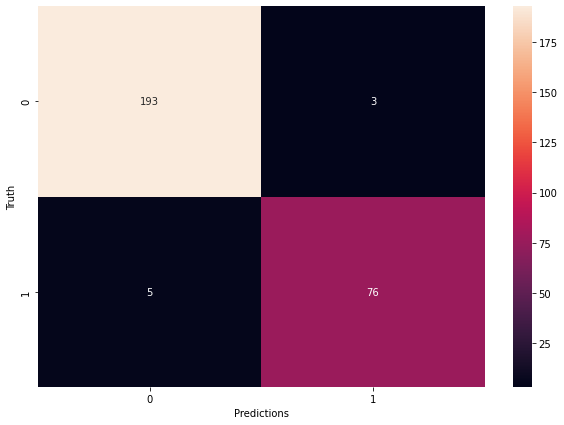

In [24]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predictions")
plt.ylabel("Truth")

In [25]:
names = {0: 'with Mask',1:'without Mask'}

In [26]:
import cv2
haar_data = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 

In [38]:
capture = cv2.VideoCapture(0)
data = []
font = cv2.FONT_HERSHEY_COMPLEX
while True:
    flag, img = capture.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y),(x+w, y+w), (0,255,0), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50,50))
            face = np.array(face).reshape(-1, 50, 50, 1)
#             face = pca.transform(face)
            prediction = cnn.predict(face)
            pred =0
            if prediction[0] >0.5:
                pred = 1
            else:
                pred = 0
#             print(prediction)
            
            n = names[int(pred)]
            cv2.putText(img, n, (x,y), font,1,(233,244,250),2)
#             print(n)
        cv2.imshow('result', img)
        if cv2.waitKey(2) == 27:
            break
capture.release()
cv2.destroyAllWindows()

without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask
without Mask